In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据

In [3]:
# 表1: 浙江流入人口
f=r'Desktop/浙江流入人口特征数据.xlsx'
df = pd.read_excel(f)
df.set_index(['id'],drop=True,inplace=True)
print('成功读取浙江流入人口特征：{}=（人口数, 特征数）'.format(df.shape))
df

成功读取浙江流入人口特征：(10000, 16)=（人口数, 特征数）


,residence,familymembers,gender,birthyear,birthmonth,nationality,education,hukou,marriage,hukouplace,flowrange,flowyear,flowmonth,flowreasons,salary,employment
id,,,,,,,,,,,,,,,,
50001,浙江省,4,女,1981,5,汉,初中,农业,再婚,浙江,省内跨市,2000,1,务工/工作,2800,是
50002,浙江省,2,男,1969,11,汉,小学,农转居,初婚,河南,跨省,2005,3,经商,3000,是
50003,浙江省,4,女,1990,7,汉,高中/中专,农业,初婚,浙江,省内跨市,2012,2,务工/工作,8000,是
50004,浙江省,2,女,1966,2,汉,初中,农转居,初婚,湖南,跨省,2000,2,经商,4000,是
50005,浙江省,3,男,1984,6,汉,高中/中专,居民,初婚,安徽,跨省,1999,2,经商,5000,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,浙江省,1,女,2001,6,其他,初中,农业,未婚,云南,跨省,2017,3,务工/工作,2400,是
59992,浙江省,1,男,1980,8,汉,初中,农转居,未婚,浙江,省内跨市,2017,6,务工/工作,8550,是
59995,浙江省,1,男,1990,10,汉,初中,农转居,未婚,湖南,跨省,2018,2,务工/工作,6000,是


(6, 10)

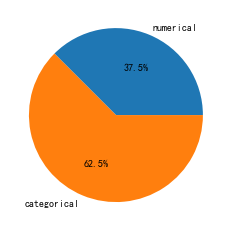

In [13]:
numerical = len(df.describe().columns)
categorical = len(df.columns) - numerical
sizes=(numerical,categorical)
plt.pie(sizes,labels=('numerical','categorical'),autopct='%1.1f%%')
sizes

In [14]:
#数据的总体概况
df.describe()

,familymembers,birthyear,birthmonth,flowyear,flowmonth,salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,3.234600,1982.277300,6.727800,2012.629300,5.010700,4985.83830
std,1.251926,10.760891,3.490118,5.597036,3.073358,6821.93657
min,1.000000,1934.000000,1.000000,1977.000000,1.000000,0.00000
25%,3.000000,1974.000000,4.000000,2010.000000,3.000000,3000.00000
50%,3.000000,1984.000000,7.000000,2015.000000,4.000000,4000.00000
75%,4.000000,1991.000000,10.000000,2017.000000,7.000000,5800.00000
max,10.000000,2003.000000,12.000000,2018.000000,12.000000,300000.00000


In [15]:
df.shape

(10000, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 50001 to 59998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   residence      10000 non-null  object
 1   familymembers  10000 non-null  int64 
 2   gender         10000 non-null  object
 3   birthyear      10000 non-null  int64 
 4   birthmonth     10000 non-null  int64 
 5   nationality    10000 non-null  object
 6   education      10000 non-null  object
 7   hukou          10000 non-null  object
 8   marriage       10000 non-null  object
 9   hukouplace     10000 non-null  object
 10  flowrange      10000 non-null  object
 11  flowyear       10000 non-null  int64 
 12  flowmonth      10000 non-null  int64 
 13  flowreasons    10000 non-null  object
 14  salary         10000 non-null  int64 
 15  employment     10000 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [17]:
df['salary'].mean()

4985.8383

In [29]:
x = df[df['hukouplace'] == '河北']
x

,residence,familymembers,gender,birthyear,birthmonth,nationality,education,hukou,marriage,hukouplace,flowrange,flowyear,flowmonth,flowreasons,salary,employment
id,,,,,,,,,,,,,,,,
51683,浙江省,3,女,1958,12,汉,未上过学,农业,初婚,河北,跨省,2017,12,家属随迁,0,否
51686,浙江省,5,女,1954,6,汉,初中,农业,初婚,河北,跨省,2017,11,家属随迁,0,否
51757,浙江省,3,女,1985,5,汉,高中/中专,农业,初婚,河北,跨省,2016,11,经商,10000,是
51934,浙江省,4,男,1976,9,汉,初中,农转居,初婚,河北,跨省,2006,5,经商,50000,是
51940,浙江省,3,女,1981,4,汉,高中/中专,非农转居,初婚,河北,跨省,2010,4,务工/工作,3000,是
51984,浙江省,4,女,1964,5,汉,小学,农业,初婚,河北,跨省,2011,5,务工/工作,0,否
52249,浙江省,3,女,1986,6,汉,高中/中专,农业,初婚,河北,跨省,2010,7,务工/工作,2010,是
52629,浙江省,2,女,1957,9,汉,小学,农业,初婚,河北,跨省,2009,3,投亲靠友,0,否
52876,浙江省,4,男,1983,5,汉,初中,农业,初婚,河北,跨省,2016,9,务工/工作,4000,是


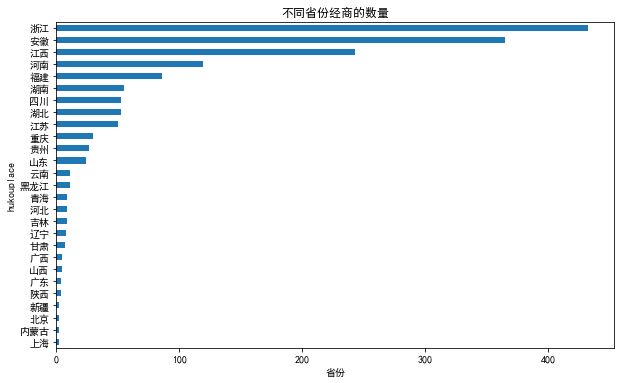

In [44]:
x = df[df['flowreasons'] == '经商'].groupby('hukouplace').count().index
y = (df[df['flowreasons'] == '经商'].groupby('hukouplace').count()).iloc[:,0]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('省份')
plt.ylabel('数量')
plt.title('不同省份经商的数量')
y.sort_values(ascending=True).plot(kind='barh',label='province')

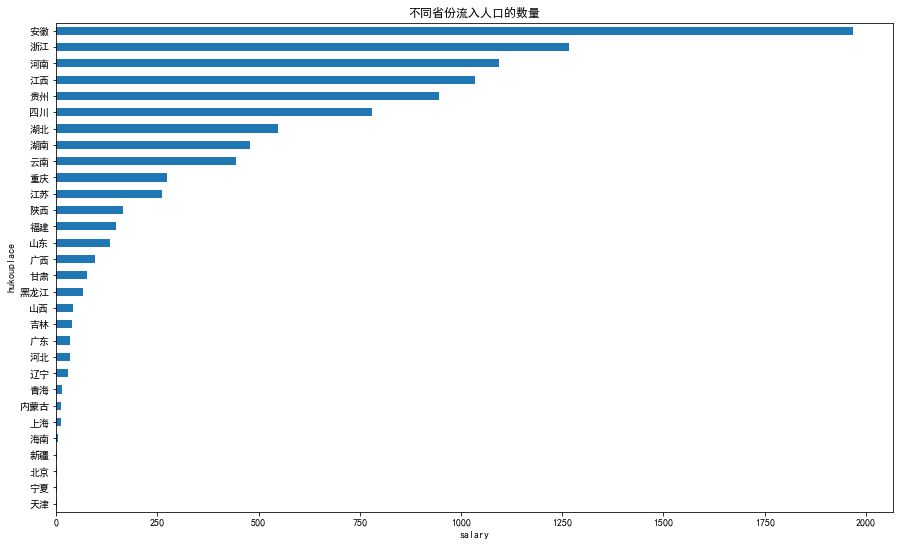

In [26]:
plt.figure(figsize=(15,9))
x = df.groupby('hukouplace').count().index
y = (df.groupby('hukouplace').count()).iloc[:,0]
plt.grid(True)
plt.ylabel('省份')
plt.xlabel('salary')
plt.title('不同省份流入人口的数量')
y.sort_values(ascending=True).plot(kind='barh',label='province')


<function matplotlib.pyplot.show(*args, **kw)>

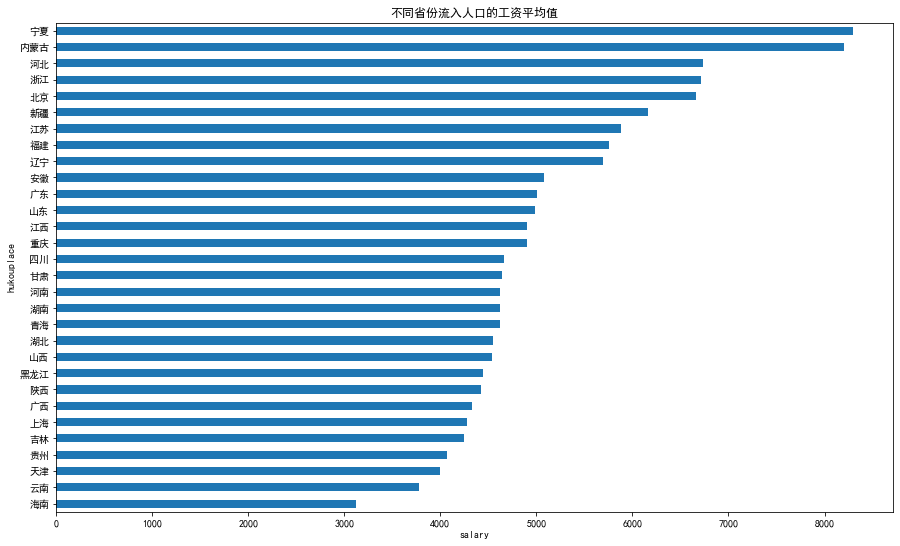

In [28]:
plt.figure(figsize=(15,9))
x = df.groupby('hukouplace').count().index
y = df.groupby('hukouplace')['salary'].mean()
plt.grid(True)
plt.ylabel('省份')
plt.xlabel('salary')
plt.title('不同省份流入人口的工资平均值')
#y.plot.pie(labels=x, autopct='%1.1f%%')
#plt.scatter(x,y)
y.sort_values(ascending=True).plot(kind='barh',label='province')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

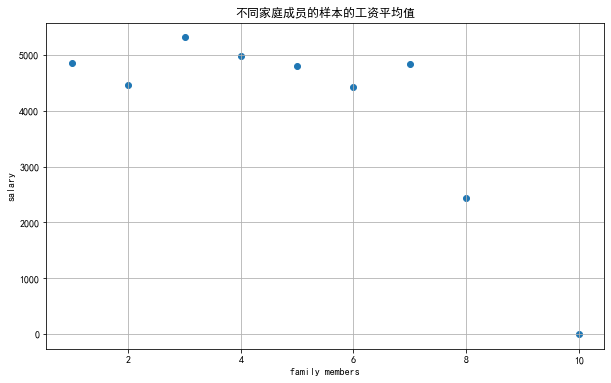

In [17]:
plt.figure(figsize=(10,6))
x = df.groupby('familymembers').count().index
y = df.groupby('familymembers')['salary'].mean()
plt.grid(True)
plt.xlabel('family members')
plt.ylabel('salary')
plt.title('不同家庭成员的样本的工资平均值')
plt.scatter(x,y)
plt.show

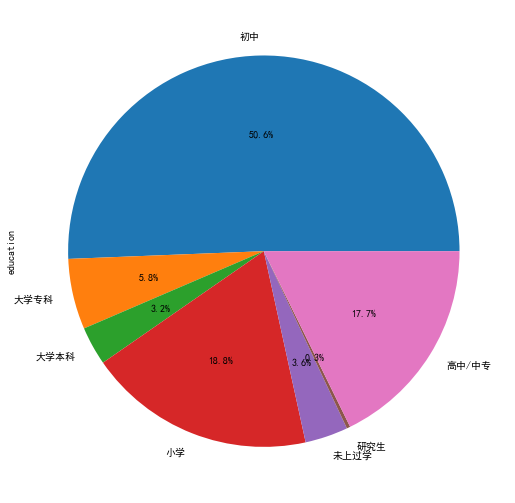

In [23]:
#流入人口的文化情况
plt.figure(figsize=(15,9))
x = df.groupby('education')['education'].count()
x.plot.pie(labels=x.index, autopct='%1.1f%%')

<function matplotlib.pyplot.show(*args, **kw)>

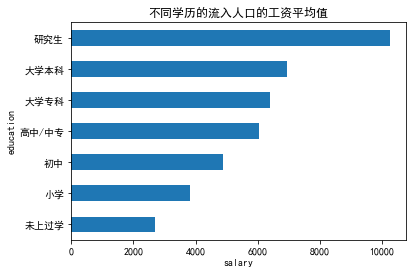

In [50]:
x = df.groupby('education').count().index
y = df.groupby('education')['salary'].mean()
plt.grid(True)
plt.title('不同学历的流入人口的工资平均值')
plt.xlabel('salary')
sizes=(numerical,categorical)
y.sort_values(ascending=True).plot(kind='barh',label='education')
plt.show

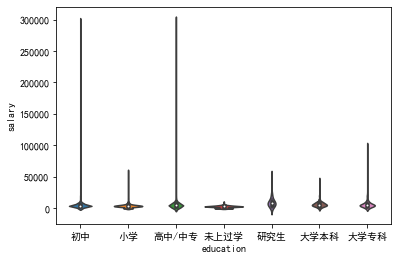

In [100]:
sns.violinplot('education','salary',data=df)

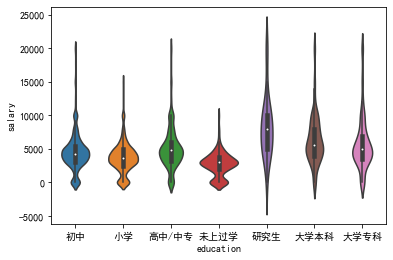

In [99]:
df1 = df.drop(df[df.salary >20000].index)
sns.violinplot('education','salary',data=df1)

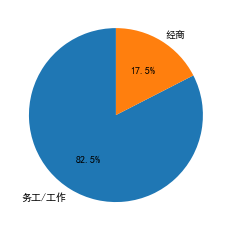

In [157]:
a = len(df[df['flowreasons']=='务工/工作'])
b = len(df[df['flowreasons']=='经商'])
df['work'] = df['flowreasons']=='务工/工作'
df['business'] = df['flowreasons']=='经商'
dict_flowreasons = {'务工/工作':a,'经商':b}
reasons = pd.Series(dict_flowreasons)
reasons.plot(kind='pie',label='',startangle=90,autopct='%1.1f%%')

In [160]:
reasonsdf = df[['work','business']]
reasonsdf.index = df['flowyear']
reasonsdf = reasonsdf.groupby('flowyear').sum().astype('int')
reasonsdf

,work,business
flowyear,,
1977,0,0
1984,1,0
1985,1,0
1986,3,0
1987,0,1
1988,2,2
1989,1,1
1990,4,0
1991,7,1


Text(0, 0.5, '数量')

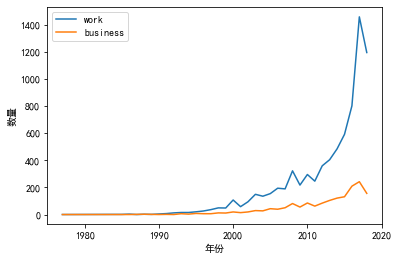

In [163]:
##务工和经商随着时间的变化 可视图
plt.plot(reasonsdf,label=reasonsdf.columns)
plt.legend(reasonsdf)
plt.xlabel('年份')
plt.ylabel('数量')

Text(0.5, 1.0, '经商和务工的平均工资')

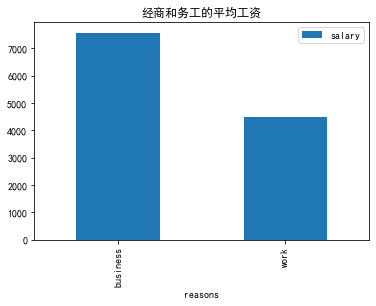

In [169]:
df['reasons'] = df['flowreasons'].str.contains('经商').apply(lambda x: 'business' if x else 'work')
df1=df[['reasons','salary']]
salary_reasons = df1.groupby('reasons').mean()
salary_reasons.plot(kind='bar')
plt.title('经商和务工的平均工资')

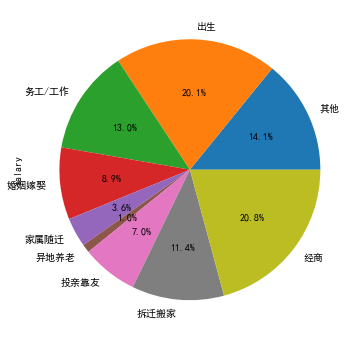

In [34]:
plt.figure(figsize=(10,6))
x = df.groupby('flowreasons')['salary'].mean()
x.plot.pie(labels=x.index, autopct='%1.1f%%')

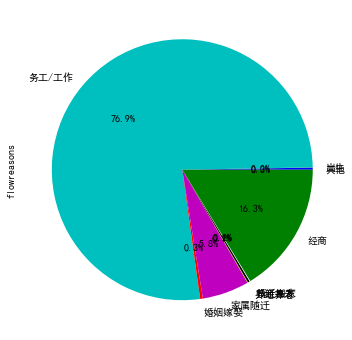

In [70]:
##流入人口不同工作的占比
plt.figure(figsize=(10,6))
x = df.groupby('flowreasons')['flowreasons'].count()
x.plot.pie(labels=x.index, autopct='%1.1f%%',
           colors=('b', 'g', 'c', 'r', 'm', 'y', 'k', 'w','g'),
           explode = (0,0,0,0,0,0,0,0,0))

Text(0.5, 1.0, '异性之间工资差异系数的频次直方图')

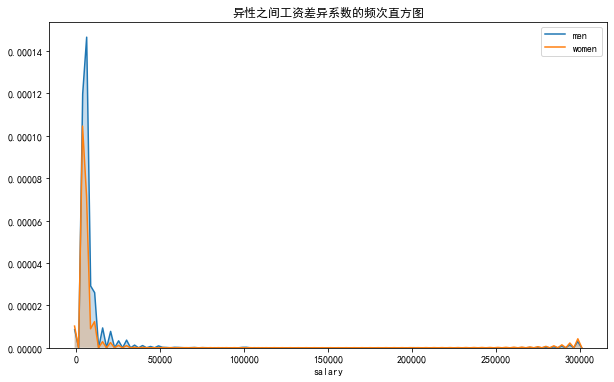

In [82]:
#对比男女之间的差异，不同异性工资差异系数的频次直方图
plt.figure(figsize=(10,6))
sns.kdeplot(df.salary[df.gender=='男'],label='men',shade=True)
sns.kdeplot(df.salary[df.gender=='女'],label='women',shade=True)
plt.xlabel('salary')
plt.title('异性之间工资差异系数的频次直方图')

In [90]:
df1.shape

(9905, 16)

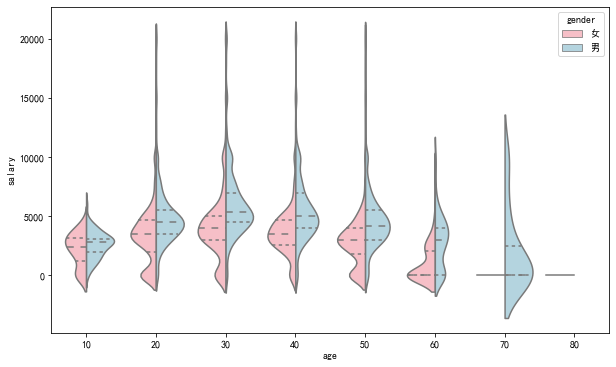

In [103]:
plt.figure(figsize=(10,6))
df1['age'] = df1.birthyear.map(lambda birthyear: 10 * ((2020 - birthyear)//10))
men = (df1.gender == '男')
women = (df1.gender == '女')
with sns.axes_style(style=None):
    sns.violinplot('age','salary',hue='gender',data=df1,split=True,inner='quartile',palette=['lightpink','lightblue'])